# **Machine Learning Unsupervised Models** #
The objective of the project is to explore all Unsupervised models in Machine learning. **Vehicle-dataset** is used throughout the projcet.

The models explored :  <br>
1. Clustering
    1. K-Means Clustering
    2. Hierarchical Clustering and its variants
    3. Density Based Clustering(DBSCAN)
2. Dimensionality Reduction
    1. Principle Component Analysis(PCA)
3. Neural Network based
    1. Auto-Encoders


## **Exploratory Data Analysis** ##

In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

### **Data Collection** ###

In [195]:
df = pd.read_csv('/content/Vehicle_dataset.csv')
print("Shape = " ,df.shape)
df

Shape =  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


### **About the dataset** ###
The dataset contains 16 explanatory variables describing (almost) every aspect of different vehicle brands for each manufacturing company.

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


transform categorical values to numeric

In [197]:
df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', \
               'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', \
               'lnsales']] = \
df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', \
              'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', \
              'lnsales']].apply(pd.to_numeric, errors='coerce')
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,NaN,0.0,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864,0.0
155,Volvo,C70,3.493,NaN,0.0,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251,0.0
156,Volvo,S80,18.969,NaN,0.0,36.00,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,2.943,0.0
157,NaN,newCar,NaN,NaN,NaN,21.50,1.5,76.0,106.3,67.9,175.0,2.932,11.9,46.0,NaN,1.0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      157 non-null    float64
 3   resale     121 non-null    float64
 4   type       157 non-null    float64
 5   price      157 non-null    float64
 6   engine_s   158 non-null    float64
 7   horsepow   158 non-null    float64
 8   wheelbas   158 non-null    float64
 9   width      158 non-null    float64
 10  length     158 non-null    float64
 11  curb_wgt   157 non-null    float64
 12  fuel_cap   158 non-null    float64
 13  mpg        156 non-null    float64
 14  lnsales    157 non-null    float64
 15  partition  159 non-null    float64
dtypes: float64(14), object(2)
memory usage: 20.0+ KB


### **Missing Values** ###

In [199]:
df.isnull().sum()

manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

drop missig values

In [200]:
df = df.dropna()
df.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

### **Feature Extraction** ##

In [201]:
X = df[['sales', 'price', 'engine_s','horsepow', 'wheelbas', 'width', 'length','curb_wgt', 'fuel_cap', 'mpg']]
X

,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,16.919,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,39.384,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
3,8.588,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,20.397,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
5,18.780,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
...,...,...,...,...,...,...,...,...,...,...
145,9.761,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0
146,83.721,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0
147,51.102,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0
148,9.569,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0


### **Data Normalization** ##

In [202]:
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
X_normalized

array([[0.0311018 , 0.16717781, 0.11428571, ..., 0.2310559 , 0.13364055,
        0.43333333],
       [0.07266894, 0.26122811, 0.31428571, ..., 0.50372671, 0.31797235,
        0.33333333],
       [0.0156869 , 0.4466026 , 0.35714286, ..., 0.60714286, 0.35483871,
        0.23333333],
       ...,
       [0.09435083, 0.16308867, 0.11428571, ..., 0.35652174, 0.28110599,
        0.4       ],
       [0.01750205, 0.14659579, 0.14285714, ..., 0.36770186, 0.15668203,
        0.36666667],
       [0.01015078, 0.1126559 , 0.14285714, ..., 0.26925466, 0.19815668,
        0.36666667]])

## **K-Means Clustering** ##
don't disturb original data ,use a copy of it.

In [203]:
X_kmeans = X_normalized
kmeans_df = df

#### **Model Training** ####

In [204]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++',n_clusters=6,n_init=5)
kmeans.fit(X_kmeans)

KMeans(n_clusters=6, n_init=5)

In [205]:
print("Labels = ",kmeans.labels_)
print("Cluster centers = ",kmeans.cluster_centers_)

Labels =  [1 0 2 3 2 4 3 0 0 0 2 0 2 2 0 1 3 0 0 0 4 1 1 3 3 2 3 2 1 3 3 4 5 5 5 2 0
 1 0 3 0 2 0 5 5 0 5 1 3 3 0 2 1 1 3 0 3 3 0 0 0 4 2 2 1 3 3 0 3 0 3 3 3 0
 2 0 2 3 0 4 4 1 3 0 2 0 3 2 0 2 1 3 0 3 3 0 0 0 3 4 4 1 1 1 1 3 0 1 3 1 3
 5 1 1 3 1 1]
Cluster centers =  [[0.12489332 0.23487017 0.33258929 0.35245253 0.34768167 0.55314371
  0.56333222 0.52135093 0.38493664 0.26958333]
 [0.10004683 0.06658798 0.12207792 0.15443038 0.15795701 0.29695155
  0.29173224 0.19318182 0.13280268 0.50454545]
 [0.0707025  0.29003893 0.39411765 0.39880864 0.47926502 0.73441353
  0.73666484 0.60944465 0.41718623 0.23333333]
 [0.10442808 0.15414048 0.21474654 0.25585953 0.25596529 0.39482326
  0.4379537  0.35241435 0.28809276 0.31935484]
 [0.01132596 0.77667314 0.53571429 0.67468354 0.2462039  0.58308383
  0.47486684 0.52725155 0.46198157 0.19166667]
 [0.29224719 0.25491525 0.46734694 0.37432188 0.67462039 0.93669803
  0.76469469 0.78407276 0.79262673 0.06190476]]


#### **Model Evaluation** ##

In [206]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")


Inertia: 11.439901357014413


In [207]:
silhouette_avg = silhouette_score(X_kmeans, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.20398292763545484


#### **Clustering visualization** ####

<ipython-input-208-11a5711f0202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_df['kmeans_cluster_'] = kmeans.labels_
<ipython-input-208-11a5711f0202>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \


Text(0, 0.5, 'mpg')

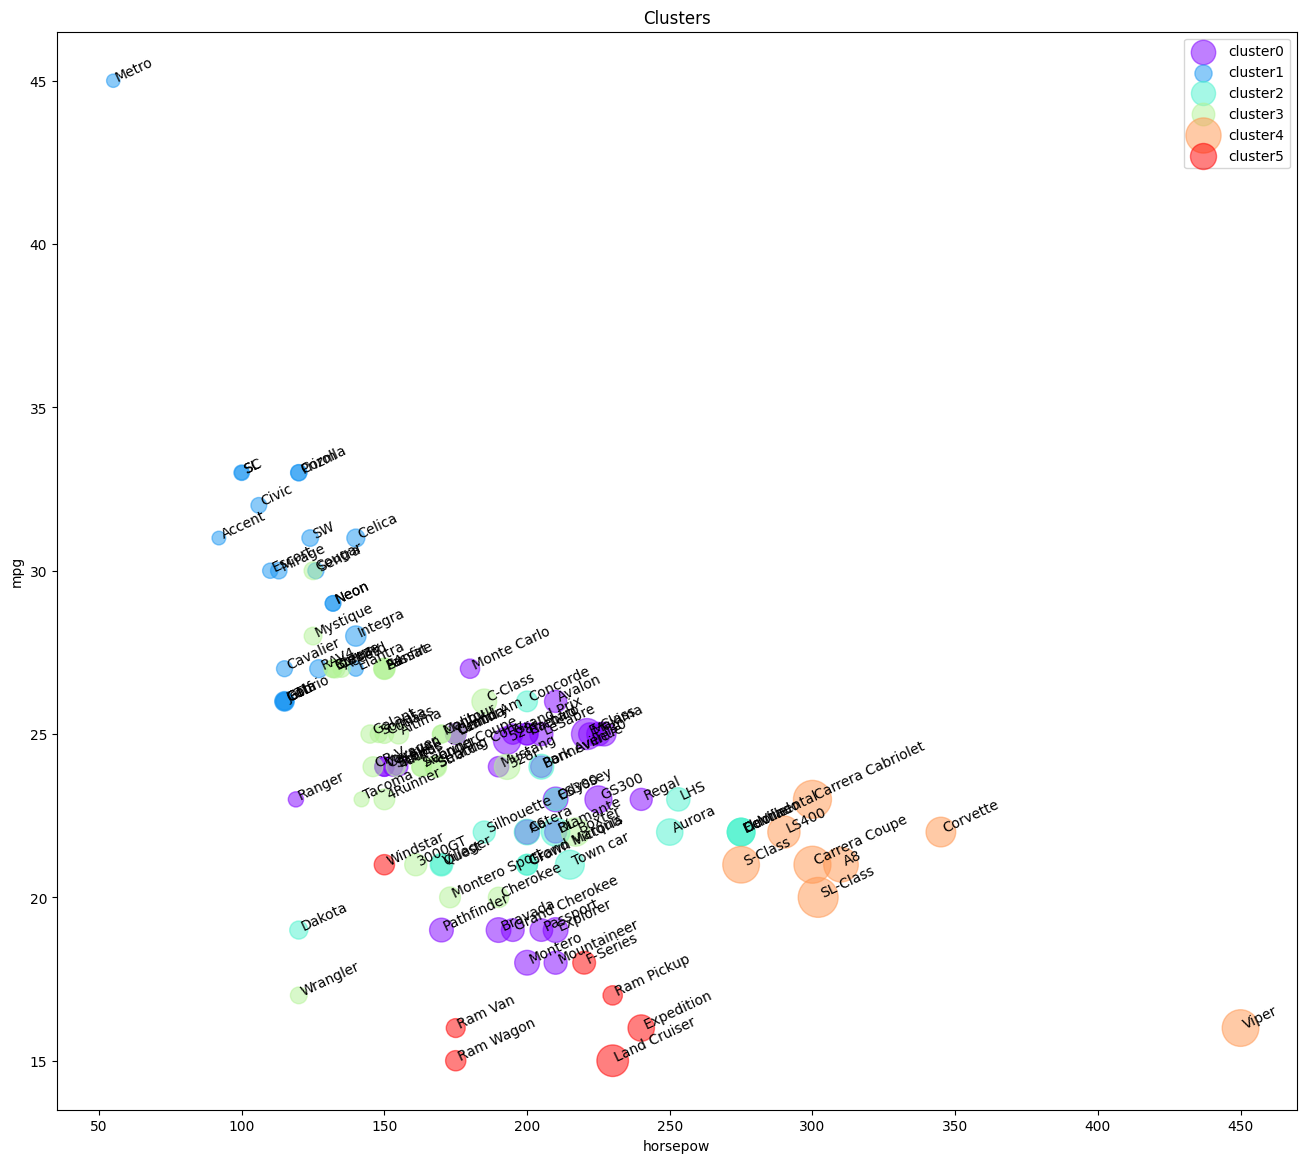

In [208]:
kmeans_df['kmeans_cluster_'] = kmeans.labels_
n_clusters = max(kmeans.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = kmeans_df[kmeans_df.kmeans_cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), \
                     rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## **Hierarchical Clustering** ##

In [209]:
X_agglomarative = X_normalized
agglomarative_df = df

3 ways to calculate distance matrix. We can fit direct feature set or distance_matrix . Here I will be using distance matrix

import required packages

In [210]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

### **Type 1 : from Scipy distance matrix** ###

#### **Distance matrix** ####

In [211]:
dist_matrix1 = distance_matrix(X_agglomarative,X_agglomarative)
dist_matrix1

array([[0.        , 0.58685016, 0.80478103, ..., 0.29225834, 0.25039062,
        0.19762846],
       [0.58685016, 0.        , 0.29931558, ..., 0.37461189, 0.67555319,
        0.64255907],
       [0.80478103, 0.29931558, 0.        , ..., 0.59510046, 0.87115091,
        0.84785694],
       ...,
       [0.29225834, 0.37461189, 0.59510046, ..., 0.        , 0.4253051 ,
        0.37044361],
       [0.25039062, 0.67555319, 0.87115091, ..., 0.4253051 , 0.        ,
        0.15603542],
       [0.19762846, 0.64255907, 0.84785694, ..., 0.37044361, 0.15603542,
        0.        ]])

#### **Model Training** ####

In [212]:
agglom1 = AgglomerativeClustering(n_clusters=6,linkage='average')
agglom1.fit(dist_matrix1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='average', n_clusters=6)

#### **Dendrogram** ####

<ipython-input-213-175e040447fe>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z1 = hierarchy.linkage(dist_matrix1,'complete')


{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [75.0, 75.0, 85.0, 85.0], [65.0, 65.0, 80.0, 80.0], [55.0, 55.0, 72.5, 72.5], [95.0, 95.0, 105.0, 105.0], [63.75, 63.75, 100.0, 100.0], [40.0, 40.0, 81.875, 81.875], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [145.0, 145.0, 155.0, 155.0], [122.5, 122.5, 150.0, 150.0], [165.0, 165.0, 175.0, 175.0], [185.0, 185.0, 195.0, 195.0], [170.0, 170.0, 190.0, 190.0], [136.25, 136.25, 180.0, 180.0], [60.9375, 60.9375, 158.125, 158.125], [12.5, 12.5, 109.53125, 109.53125], [205.0, 205.0, 215.0, 215.0], [225.0, 225.0, 235.0, 235.0], [245.0, 245.0, 255.0, 255.0], [230.0, 230.0, 250.0, 250.0], [265.0, 265.0, 275.0, 275.0], [285.0, 285.0, 295.0, 295.0], [270.0, 270.0, 290.0, 290.0], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [280.0, 280.0, 312.5, 312.5], [240.0, 240.0, 296.25, 296.25], [210.0, 210.0, 268.125, 268.125], [345.0, 345.0, 355.0, 355.0], [365.0, 365.0, 375.0, 375.0], [385

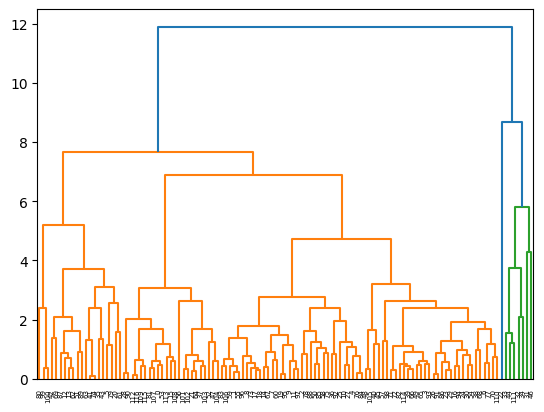

In [213]:
z1 = hierarchy.linkage(dist_matrix1,'complete')
dendro1 = hierarchy.dendrogram(z1)
print(dendro1)

#### **Clustering Visualization** ####

<ipython-input-214-b99cbfdc27c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agglomarative_df['agglom1_cluster_'] = agglom1.labels_
<ipython-input-214-b99cbfdc27c6>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \


Text(0, 0.5, 'mpg')

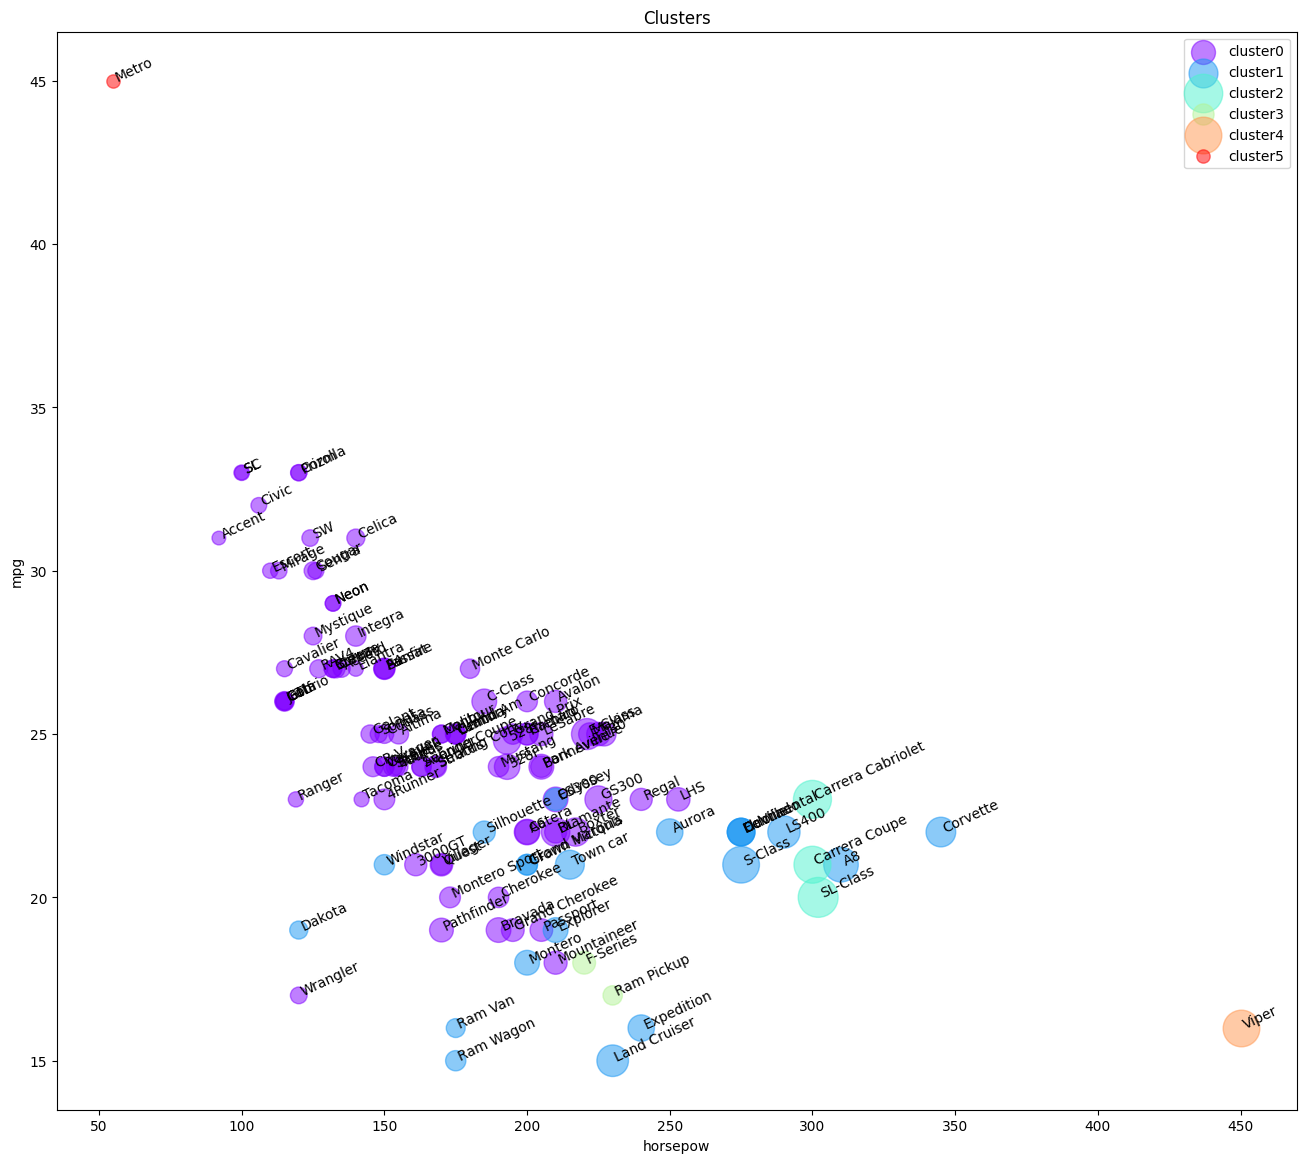

In [214]:
agglomarative_df['agglom1_cluster_'] = agglom1.labels_
n_clusters = max(agglom1.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = agglomarative_df[agglomarative_df.agglom1_cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), \
                     rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### **Type 2 : from  sklearn euclidean_distances()** ###

#### **Distance Matrix** ####

In [215]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix2 = euclidean_distances(X_agglomarative,X_agglomarative)

#### **Model Training** ####

In [216]:
agglom2 = AgglomerativeClustering(n_clusters=6,linkage='complete')
agglom2.fit(dist_matrix2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=6)

#### **Dendrogram** ####

<ipython-input-217-4130e47a8c4a>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z2 = hierarchy.linkage(dist_matrix2,'complete')


{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [75.0, 75.0, 85.0, 85.0], [65.0, 65.0, 80.0, 80.0], [55.0, 55.0, 72.5, 72.5], [95.0, 95.0, 105.0, 105.0], [63.75, 63.75, 100.0, 100.0], [40.0, 40.0, 81.875, 81.875], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [145.0, 145.0, 155.0, 155.0], [122.5, 122.5, 150.0, 150.0], [165.0, 165.0, 175.0, 175.0], [185.0, 185.0, 195.0, 195.0], [170.0, 170.0, 190.0, 190.0], [136.25, 136.25, 180.0, 180.0], [60.9375, 60.9375, 158.125, 158.125], [12.5, 12.5, 109.53125, 109.53125], [205.0, 205.0, 215.0, 215.0], [225.0, 225.0, 235.0, 235.0], [245.0, 245.0, 255.0, 255.0], [230.0, 230.0, 250.0, 250.0], [265.0, 265.0, 275.0, 275.0], [285.0, 285.0, 295.0, 295.0], [270.0, 270.0, 290.0, 290.0], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [280.0, 280.0, 312.5, 312.5], [240.0, 240.0, 296.25, 296.25], [210.0, 210.0, 268.125, 268.125], [345.0, 345.0, 355.0, 355.0], [365.0, 365.0, 375.0, 375.0], [385

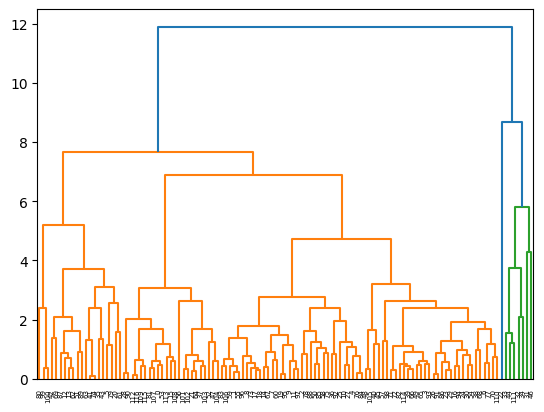

In [217]:
z2 = hierarchy.linkage(dist_matrix2,'complete')
dendro2 = hierarchy.dendrogram(z2)
print(dendro2)

#### **Clustering Visualization** ####

<ipython-input-218-11da422513b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agglomarative_df['agglom2_cluster_'] = agglom2.labels_
<ipython-input-218-11da422513b1>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \


Text(0, 0.5, 'mpg')

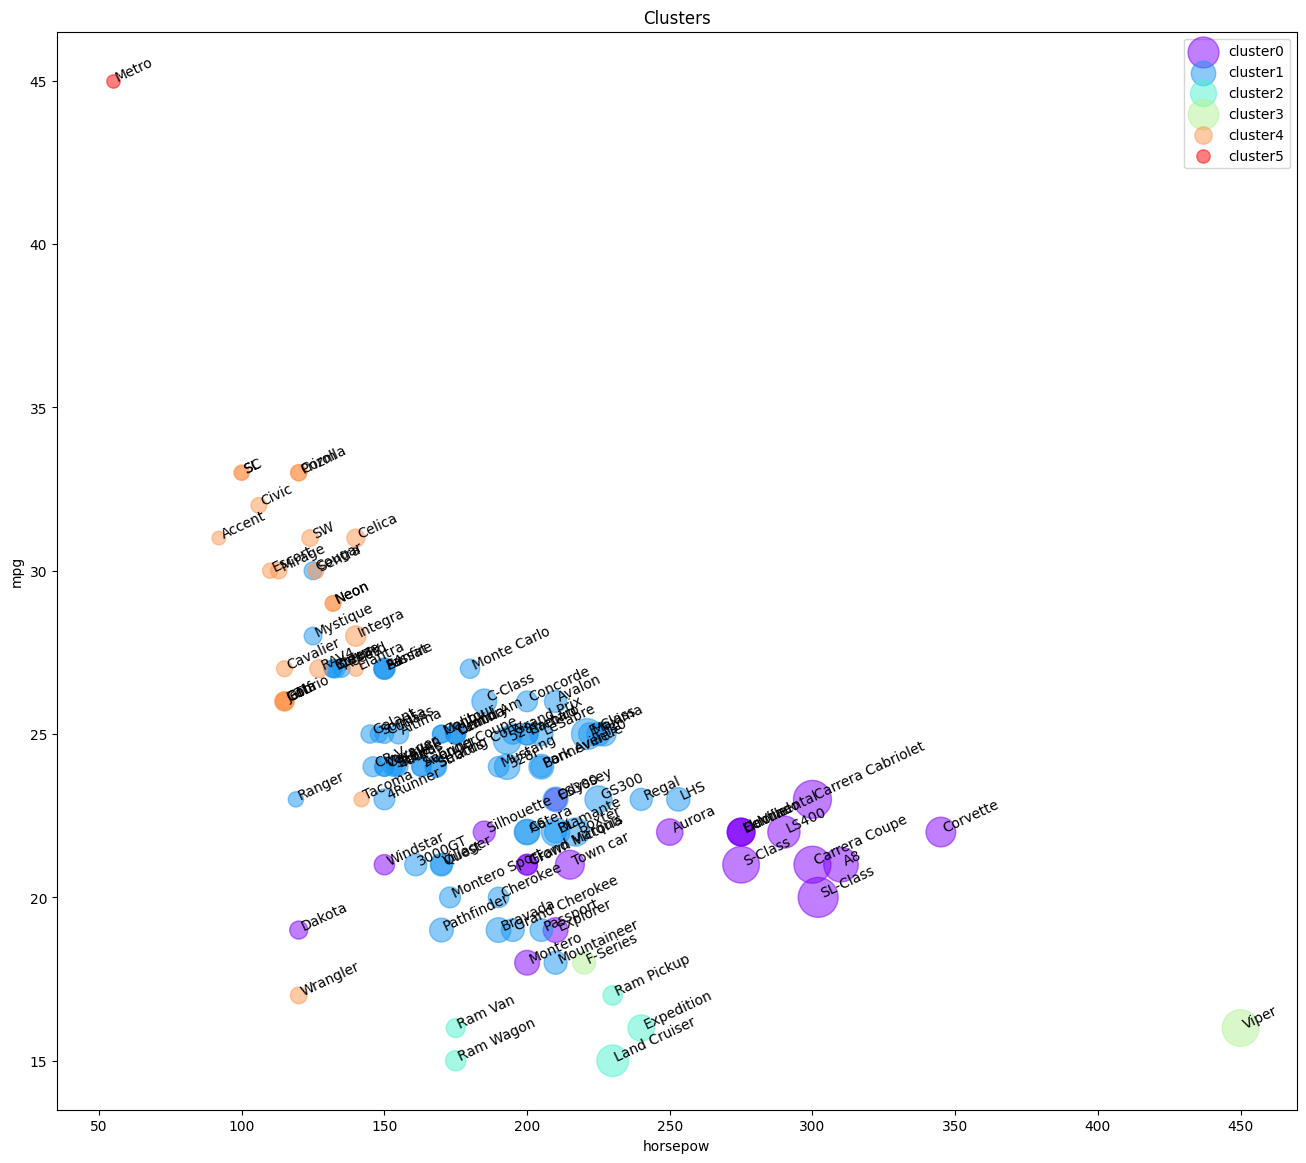

In [218]:
agglomarative_df['agglom2_cluster_'] = agglom2.labels_
n_clusters = max(agglom2.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = agglomarative_df[agglomarative_df.agglom2_cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), \
                     rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### **Type 3 : from Scipy distance.euclidean()** ###

#### **Distance Matrix** ####

In [219]:
import scipy
leng = X_agglomarative.shape[0]
distance_matrix3 = np.zeros([leng, leng])

for i in range(leng):
    for j in range(leng):
        distance_matrix3[i, j] = scipy.spatial.distance.euclidean(X_agglomarative[i], X_agglomarative[j])

#### **Model Training** ####

In [220]:
agglom3 = AgglomerativeClustering(n_clusters=6,linkage='complete')
agglom3.fit(distance_matrix3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=6)

#### **Dendrogram** ####

<ipython-input-221-84c731a6fe91>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z3 = hierarchy.linkage(distance_matrix3,'complete')


{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [75.0, 75.0, 85.0, 85.0], [65.0, 65.0, 80.0, 80.0], [55.0, 55.0, 72.5, 72.5], [95.0, 95.0, 105.0, 105.0], [63.75, 63.75, 100.0, 100.0], [40.0, 40.0, 81.875, 81.875], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [145.0, 145.0, 155.0, 155.0], [122.5, 122.5, 150.0, 150.0], [165.0, 165.0, 175.0, 175.0], [185.0, 185.0, 195.0, 195.0], [170.0, 170.0, 190.0, 190.0], [136.25, 136.25, 180.0, 180.0], [60.9375, 60.9375, 158.125, 158.125], [12.5, 12.5, 109.53125, 109.53125], [205.0, 205.0, 215.0, 215.0], [225.0, 225.0, 235.0, 235.0], [245.0, 245.0, 255.0, 255.0], [230.0, 230.0, 250.0, 250.0], [265.0, 265.0, 275.0, 275.0], [285.0, 285.0, 295.0, 295.0], [270.0, 270.0, 290.0, 290.0], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [280.0, 280.0, 312.5, 312.5], [240.0, 240.0, 296.25, 296.25], [210.0, 210.0, 268.125, 268.125], [345.0, 345.0, 355.0, 355.0], [365.0, 365.0, 375.0, 375.0], [385

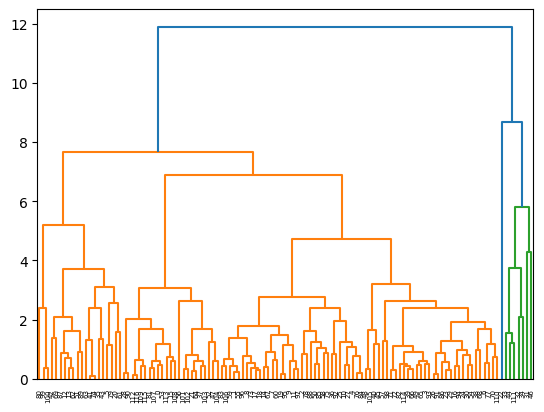

In [221]:
z3 = hierarchy.linkage(distance_matrix3,'complete')
dendro3 = hierarchy.dendrogram(z3)
print(dendro3)

#### **Clustering Visualization** ####

<ipython-input-222-0f3a954b7113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agglomarative_df['agglom3_cluster_'] = agglom3.labels_
<ipython-input-222-0f3a954b7113>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \


Text(0, 0.5, 'mpg')

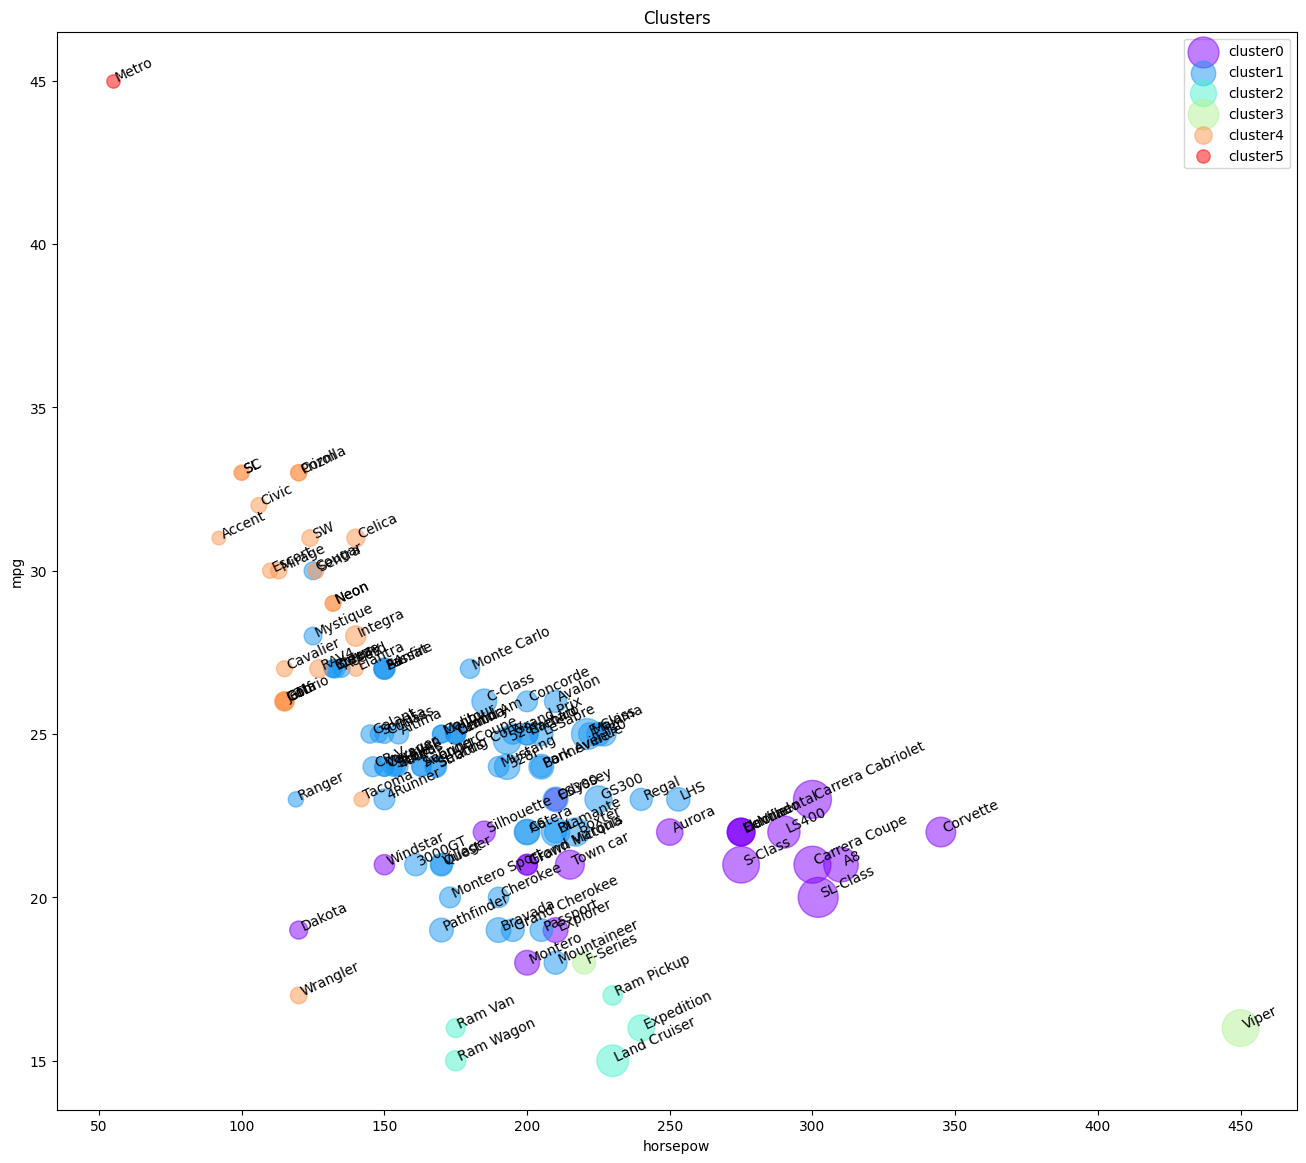

In [222]:
agglomarative_df['agglom3_cluster_'] = agglom3.labels_
n_clusters = max(agglom3.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = agglomarative_df[agglomarative_df.agglom3_cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), \
                     rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## **Density Based Clustering** ##

copy data

In [223]:
X_density = X_normalized
Density_df = df

### **Model Training** ###

In [224]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_density)

DBSCAN()

### **Model Evaluation** ###

In [225]:
dbscan_labels = dbscan.labels_

In [226]:
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(X_density, dbscan_labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Unable to compute Silhouette Score for a single cluster or all noise points.")

Silhouette Score: 0.4360136945866543


### **Clustering Visualization** ###

<ipython-input-227-916cf9ae8ce9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Density_df['dbscan_cluster_'] = dbscan.labels_
<ipython-input-227-916cf9ae8ce9>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \


Text(0, 0.5, 'mpg')

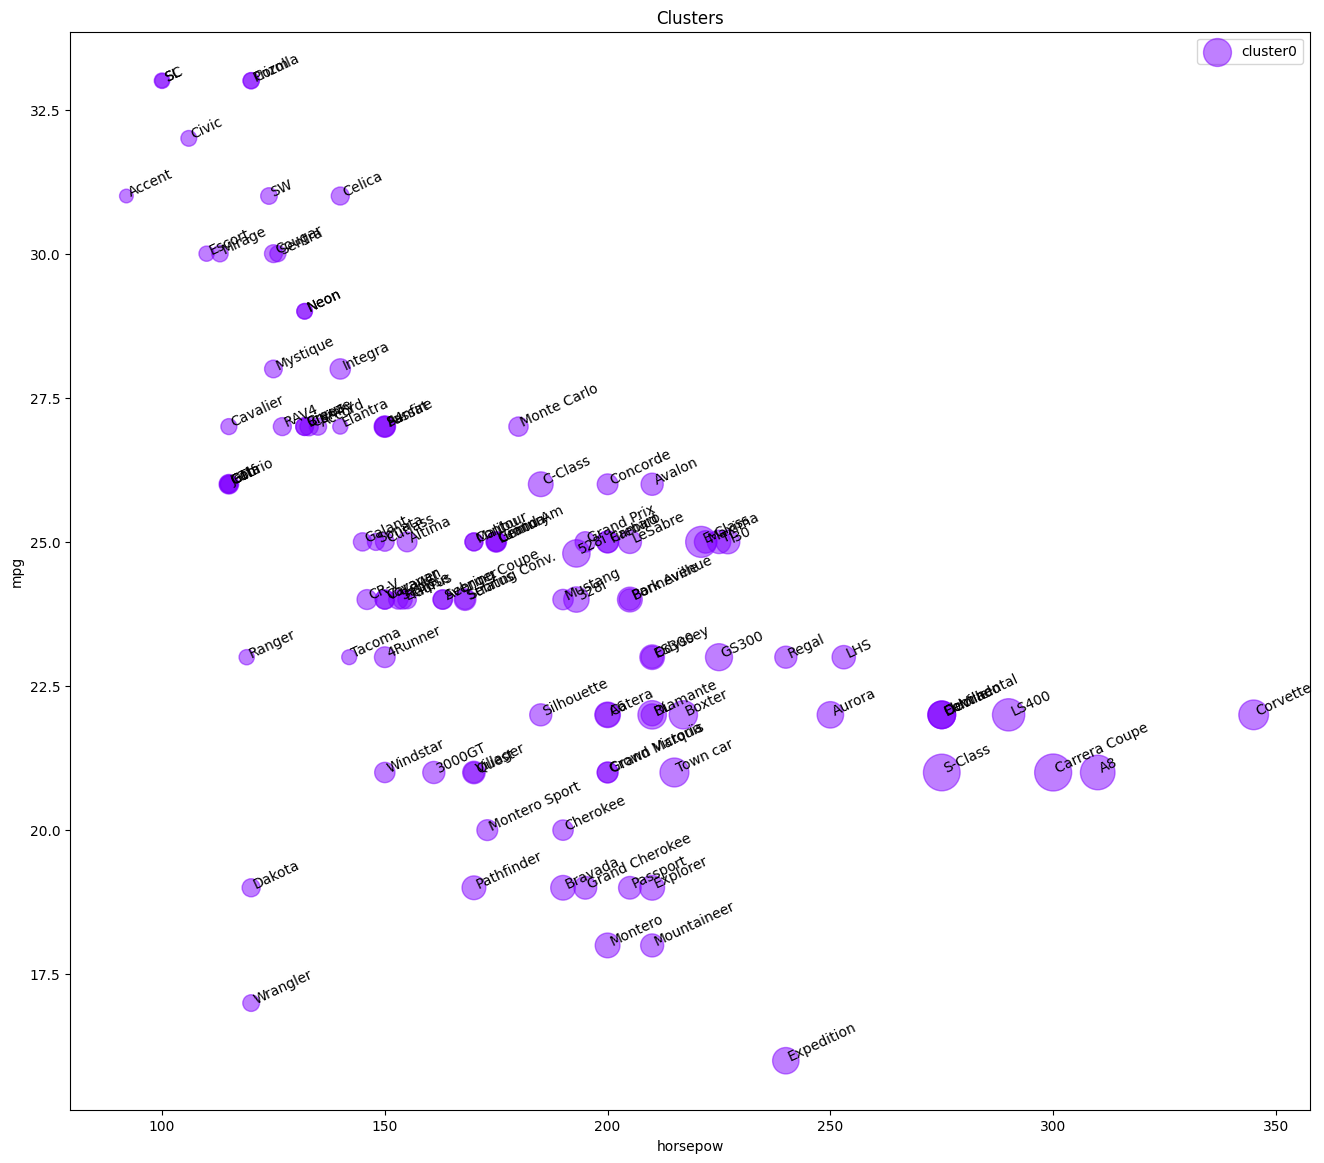

In [227]:
Density_df['dbscan_cluster_'] = dbscan.labels_
n_clusters = max(dbscan.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = Density_df[Density_df.dbscan_cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), \
                     rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## **Dimensionality Reduction** ##

In [228]:
X_pca = X_normalized
pca_df = df

### **Principle Component Analysis(PCA)** ###

#### **Model Training** ####

In [229]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

#### **Model Evaluation** ####

In [230]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.59809723 0.1862644 ]


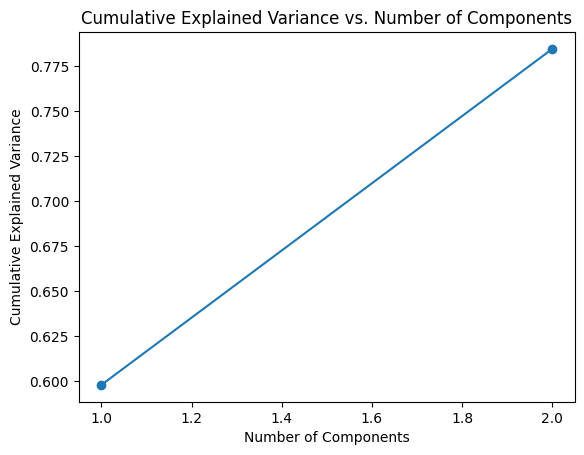

In [231]:
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

#### **Components Visualization** ####

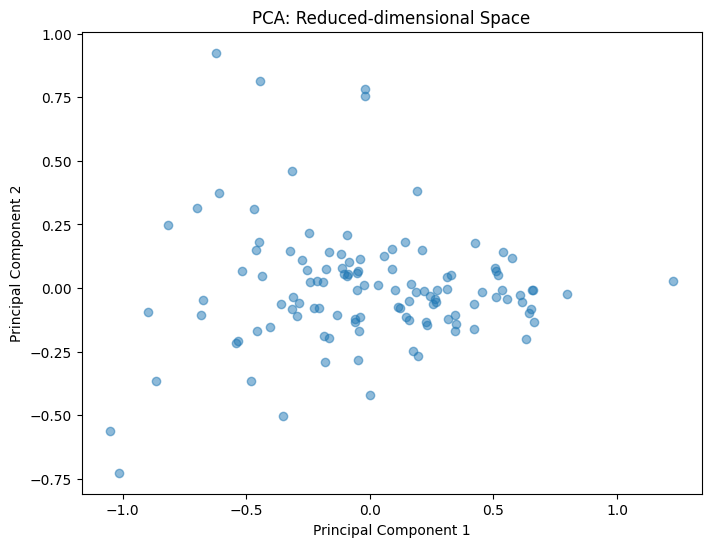

In [232]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA: Reduced-dimensional Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **Neural Networks based** ##

In [233]:
X_nn = X_normalized
NN_df = df

### **Auto-Encoders** ###

#### **Model Training** ####

In [234]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Build an autoencoder
input_layer = Input(shape=(10,))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(10, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_nn, X_nn, epochs=50, batch_size=32)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 0.0691
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0683
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0679
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0675
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0666
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0656
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 11/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 12/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0638
Epoch 13/50
4/4 [==============================] - 0s 4ms/step - loss: 0.

#### **Model Evaluation** ####

In [235]:
# Evaluate the autoencoder
loss = autoencoder.evaluate(X_nn, X_nn)
print(f"Mean Squared Error (MSE) on the test data: {loss}")


4/4 [==============================] - 0s 4ms/step - loss: 0.0408
Mean Squared Error (MSE) on the test data: 0.040819160640239716


#### **Visualization** ####

4/4 [==============================] - 0s 3ms/step


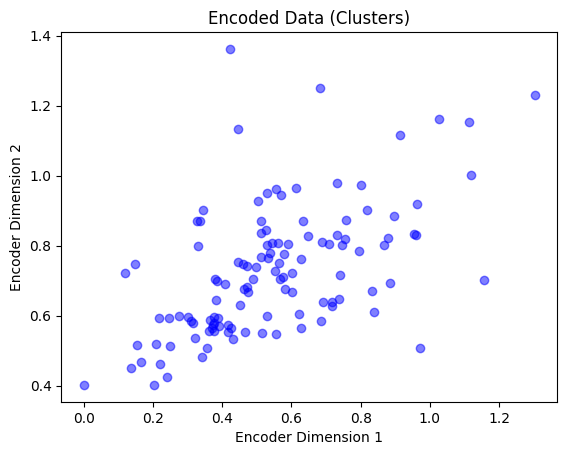

In [236]:
# Obtain the encoder part of the autoencoder
encoder_model = Model(input_layer, encoded)

# Encode the input data
encoded_data = encoder_model.predict(X_nn)

# Plot the encoded data
import matplotlib.pyplot as plt

plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Data (Clusters)')
plt.xlabel('Encoder Dimension 1')
plt.ylabel('Encoder Dimension 2')
plt.show()
